# Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn


import warnings                                    
warnings.filterwarnings('ignore')

# Data Preprocessing (Preparing Dataset)

# Attribute Information:
Id number: 1 to 214 (removed from CSV file)

RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute) [1-7]
Building_windows_float_processed
Building_windows_non_float_processed
Vehicle_windows_float_processed
Vehicle_windows_non_float_processed
Containers
Tableware
Headlamps

# Importing Dataset 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv')
df

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Adding meaningful column/attribute names

In [3]:
names = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
208,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          213 non-null    float64
 1   Na          213 non-null    float64
 2   Mg          213 non-null    float64
 3   Al          213 non-null    float64
 4   Si          213 non-null    float64
 5   K           213 non-null    float64
 6   Ca          213 non-null    float64
 7   Ba          213 non-null    float64
 8   Fe          213 non-null    float64
 9   glass_type  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Data Cleaning

In [7]:
#checking for all the null values in the columns
df.isnull().sum()

RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.shape

(213, 10)

# Expolatory Data Analysis (EDA)

In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Above statistics shows that data is across all attributes is not in same range, so we will have to normalize the data first

The features are not on the same scale. I.e. Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check the distribution of the glass types.

In [11]:
df.shape

(213, 10)

In [12]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass_type'], dtype='object')

<Axes: >

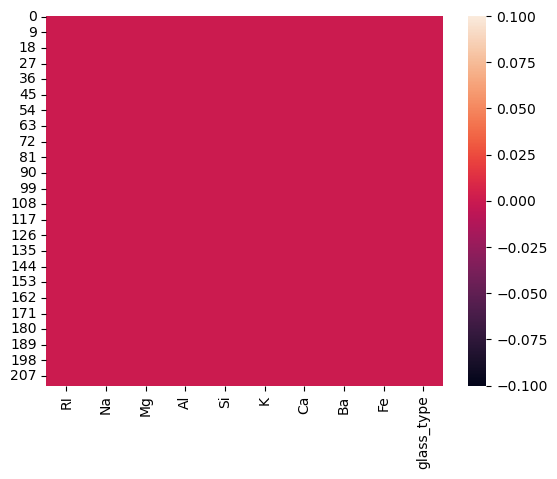

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.nunique()

RI            177
Na            142
Mg             93
Al            117
Si            132
K              65
Ca            143
Ba             34
Fe             32
glass_type      6
dtype: int64

In [15]:
df.dtypes

RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
glass_type      int64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          213 non-null    float64
 1   Na          213 non-null    float64
 2   Mg          213 non-null    float64
 3   Al          213 non-null    float64
 4   Si          213 non-null    float64
 5   K           213 non-null    float64
 6   Ca          213 non-null    float64
 7   Ba          213 non-null    float64
 8   Fe          213 non-null    float64
 9   glass_type  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Correlation

In [17]:
# Checking the Correlation with respect to target variable;-

df.corr()['glass_type'].sort_values()

Mg           -0.744004
Fe           -0.191090
RI           -0.161322
K            -0.012765
Ca            0.000372
Si            0.147767
Na            0.504983
Ba            0.574896
Al            0.597754
glass_type    1.000000
Name: glass_type, dtype: float64

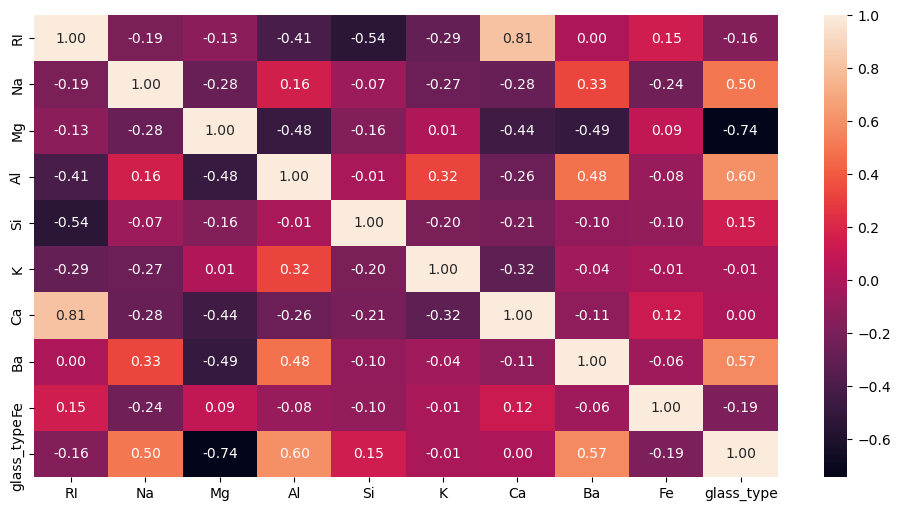

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')
plt.show()

# Checking for Skewness

In [19]:
df.skew()

RI            1.639658
Na            0.457318
Mg           -1.154323
Al            0.900017
Si           -0.744546
K             6.549276
Ca            2.040591
Ba            3.406749
Fe            1.747173
glass_type    1.108861
dtype: float64

In [20]:
# Seprating Class labels and Features

features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

X = df[features]

y = df[label]
     

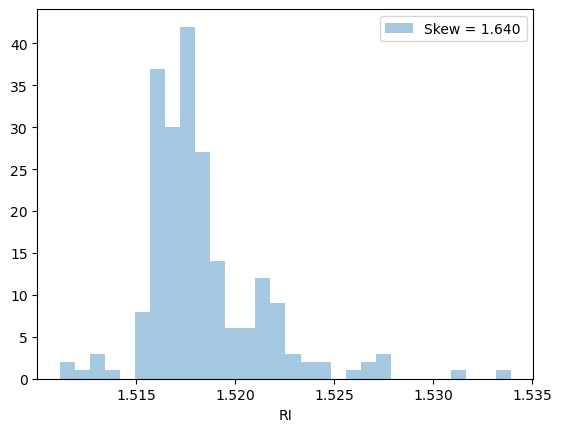

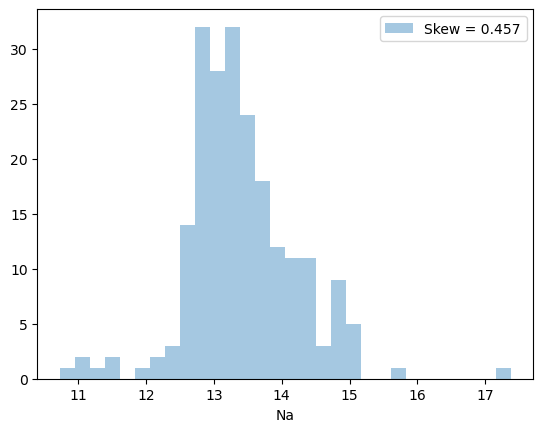

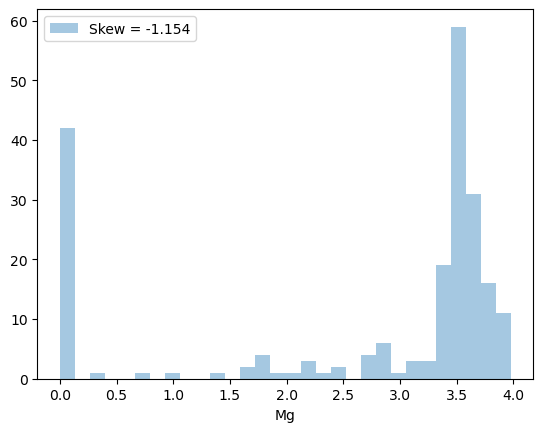

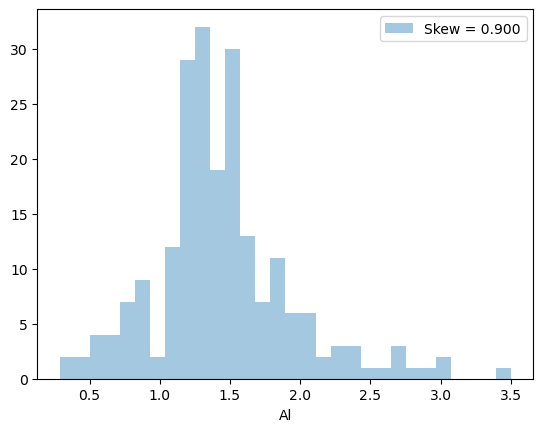

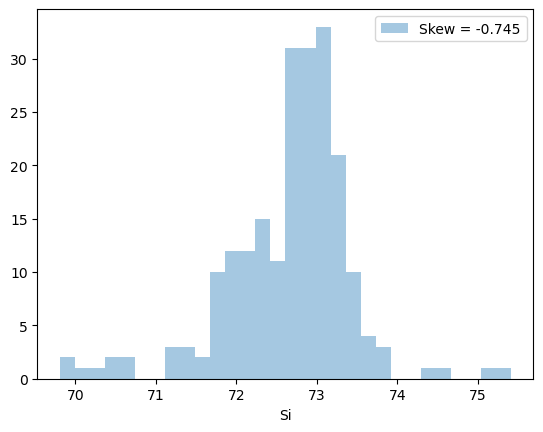

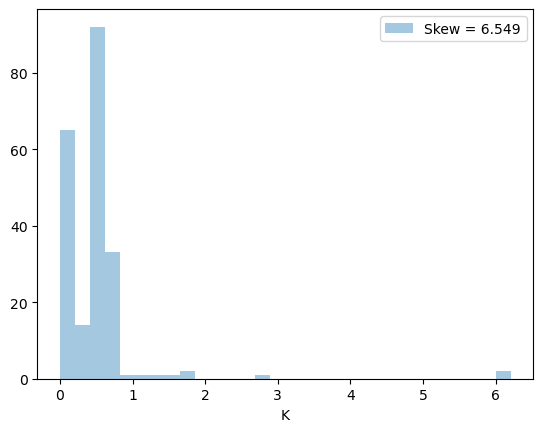

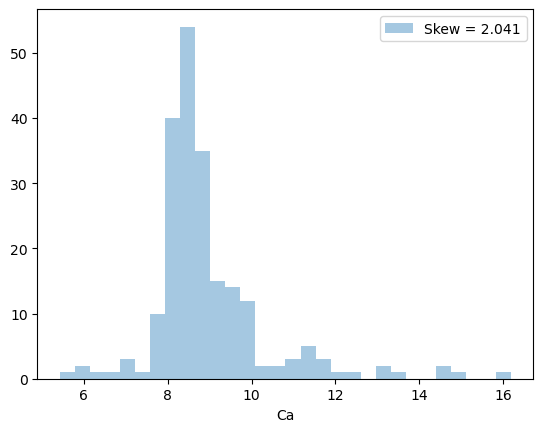

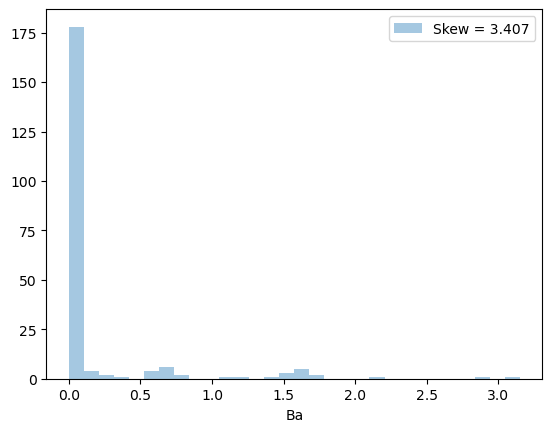

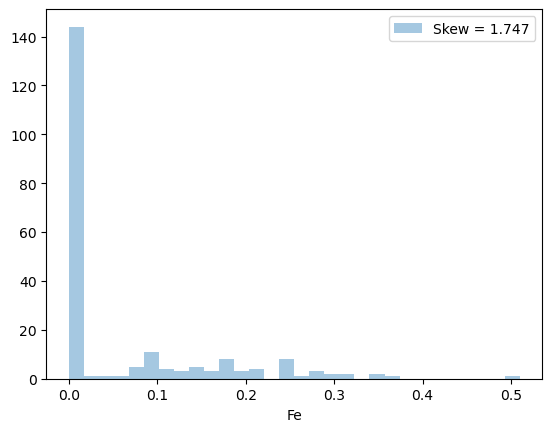

In [21]:
#Trying to gain more Insights about the data

for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Observations:
1)The distribution of potassium (K) and Barium (Ba) seem to contain many outliers.
2)The features Fe, Ba, Ca and K are Highly Skewed (They have High skew coefficients).
3)None of the features follow Normal Distribution (are not normally distributed).

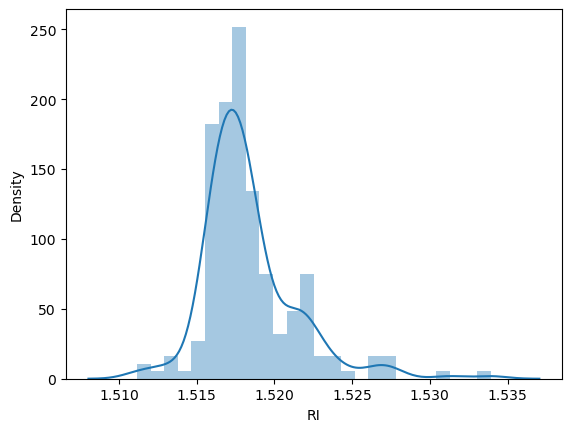

In [22]:
# checking with the distribution curve:-

sns.distplot(df['RI'])
plt.show()

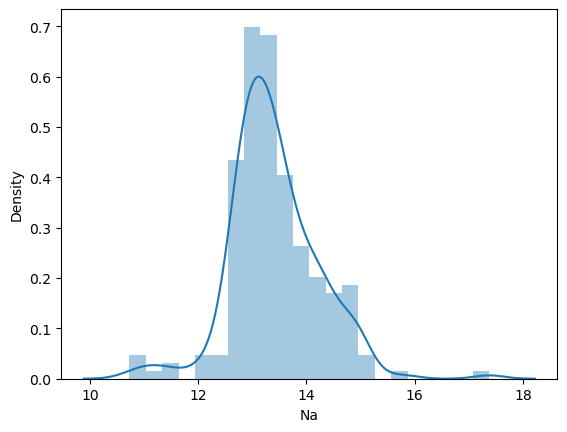

In [23]:
sns.distplot(df['Na'])
plt.show()

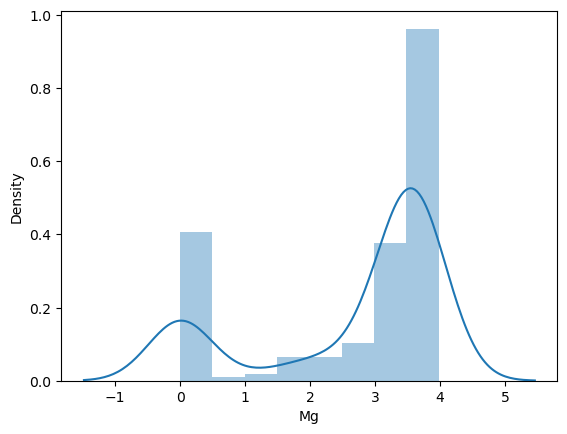

In [24]:
sns.distplot(df['Mg'])
plt.show()

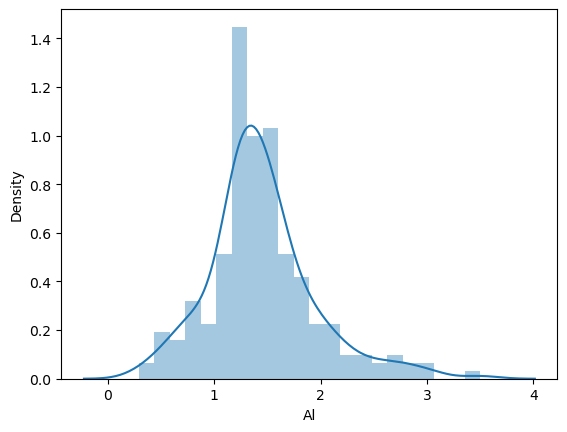

In [25]:
sns.distplot(df['Al'])
plt.show()

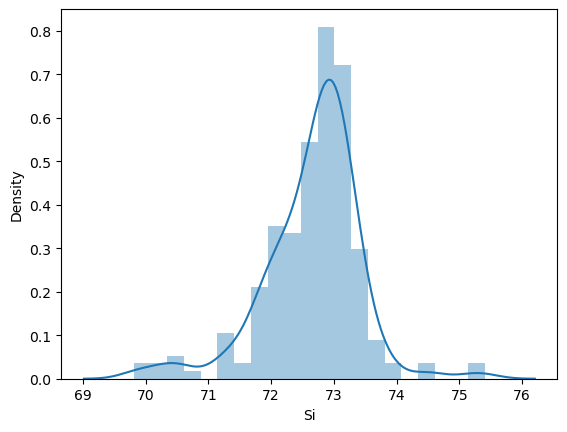

In [26]:
sns.distplot(df['Si'])
plt.show()

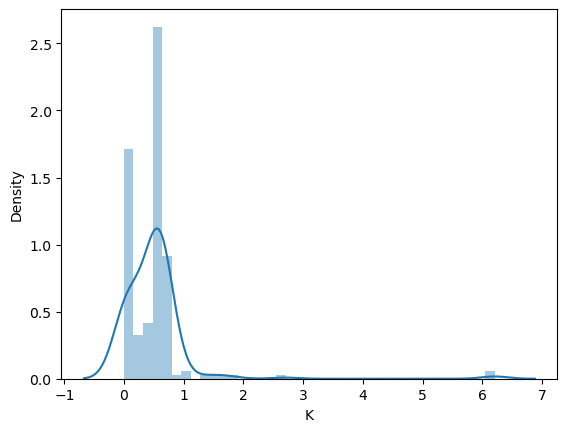

In [27]:
sns.distplot(df['K'])
plt.show()

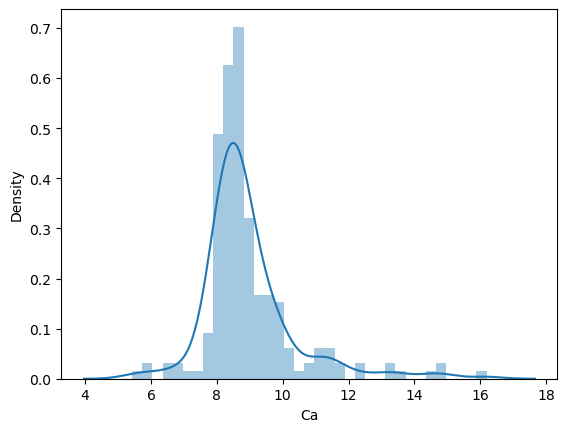

In [28]:
sns.distplot(df['Ca'])
plt.show()

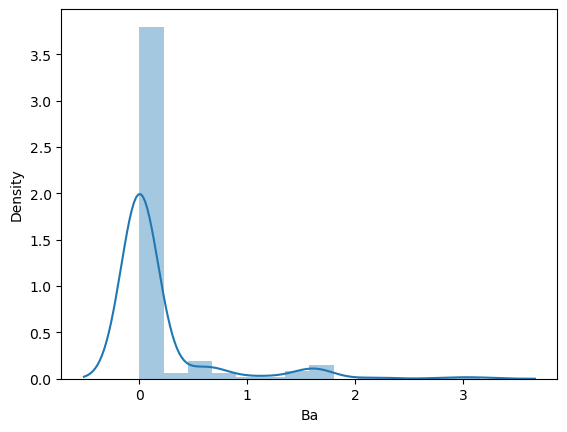

In [29]:
sns.distplot(df['Ba'])
plt.show()

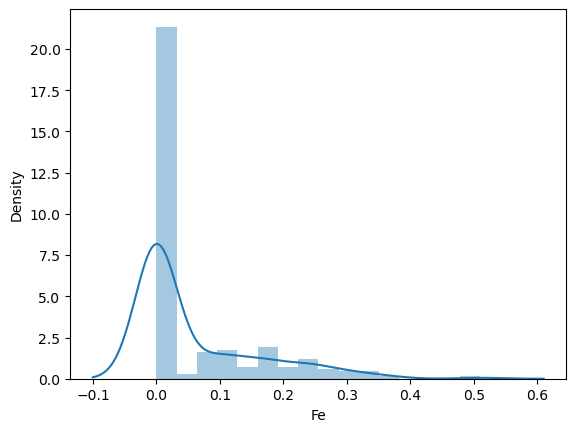

In [30]:
sns.distplot(df['Fe'])
plt.show()

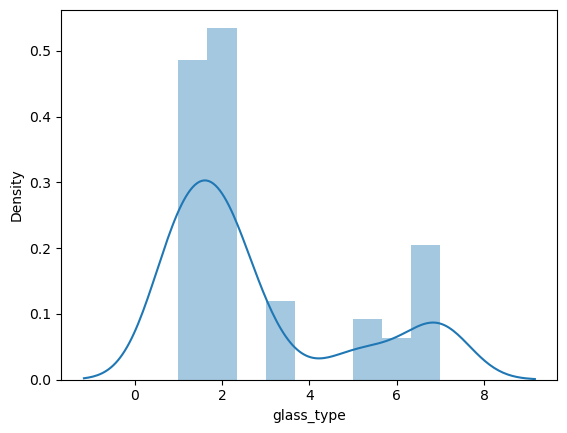

In [31]:
sns.distplot(df['glass_type'])
plt.show()

Our dataset is skewed either on positive side or negative side and data is not normalized

<Figure size 800x800 with 0 Axes>

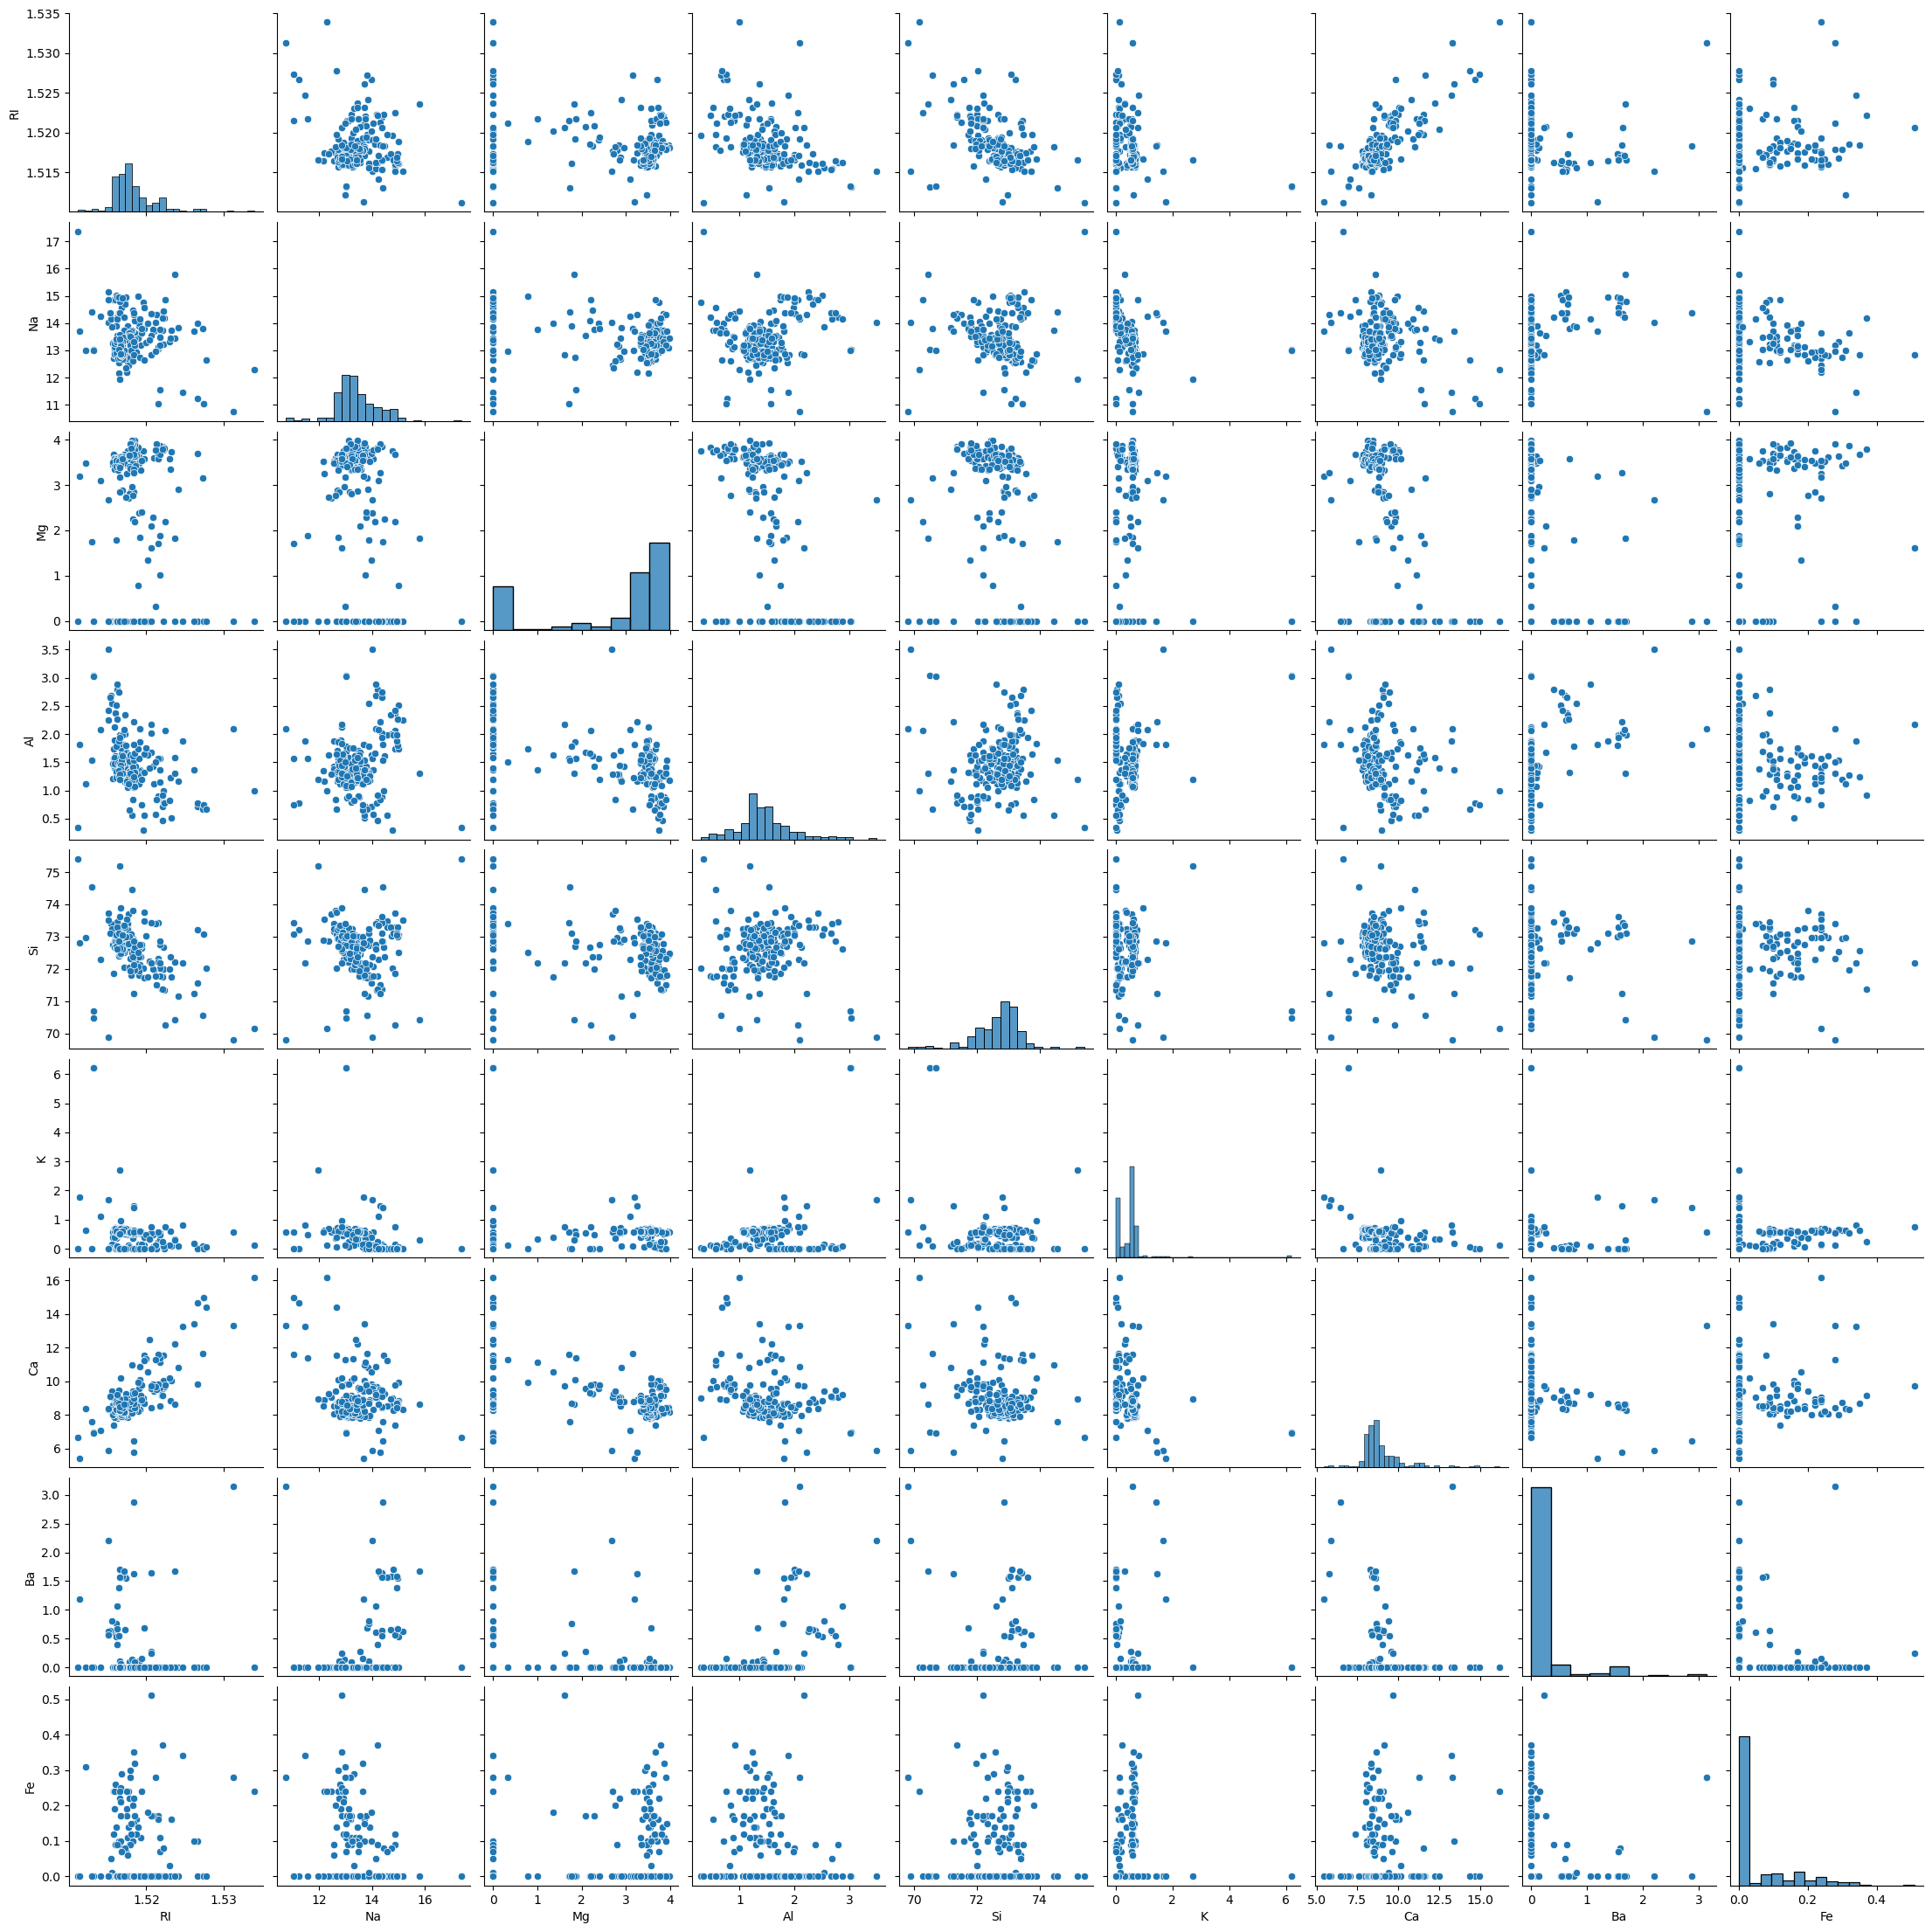

In [32]:
#Using Multivariate Plots

x2 = pd.DataFrame(X)
plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

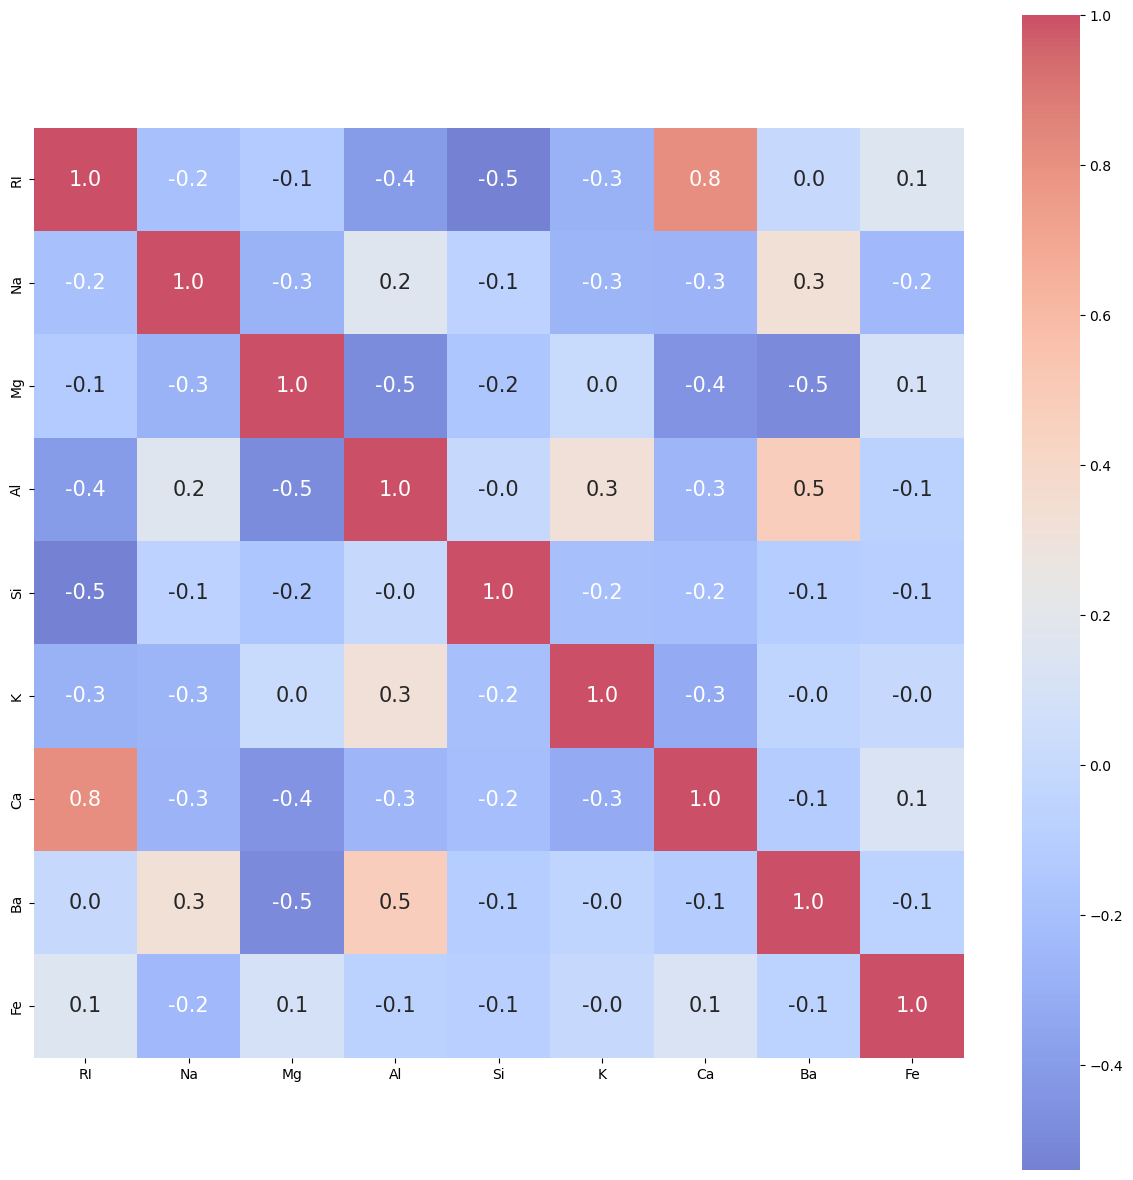

In [33]:
#Using Correlation Matrix

coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

AI and Ba have intermediate correlation between each other.
RI and Ca have strong correlation between each other. ( This could be a sign to perform Principal component analysis in order to decorrelate some of the input features. )

# Outlier Detection

In [34]:
from collections import Counter
import warnings

In [35]:
# Detect observations with more than one outlier

def outlier_hunt(data):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    
    for col in data.columns.tolist():
       
        Q1 = np.percentile(data[col], 25)
        
       
        Q3 = np.percentile(data[col],75)
        
        
        IQR = Q3 - Q1
        
        
        outlier_step = 1.5 * IQR
        
        
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        
        
        outlier_indices.extend(outlier_list_col)
        
   
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))   
     

The dataset contains 14 observations with more than 2 outliers


In our data, There exists around 14 observations with multiple outliers.
These could harm the efficiency of our learning algorithms. We'll remove them now.

In [36]:
df.shape

(213, 10)

In [37]:
#Removing Outliers
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)

print(df.shape)

(199, 10)


In [38]:
## normalizing/Scalling the data in [0,1] Range 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
X.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0


In [40]:
y.head(2)

,glass_type
0,1
1,1


# Machine Learning Algorithms Training and Testing Process

In [41]:
from sklearn.base import TransformerMixin 
# To create new classes for transformations

from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
# preprocessing 

from sklearn.decomposition import PCA 
# dimensionality reduction

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox 
# data transform

from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# model selection modules



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,stratify=y)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))
     

Shape of X_train = (159, 9)
Shape of X_test = (54, 9)
Shape of y_train = (159,)
Shape of y_test = (54,)


# K-Nearest Neighbors

In [42]:
Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    Scores.append(score)

print(knn.score(X_train,y_train))
print(Scores)

0.7044025157232704
[0.6666666666666666, 0.6481481481481481, 0.6666666666666666, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.6851851851851852, 0.7222222222222222]


# Decision Tree

In [43]:
Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test,y_test)
    Scores.append(score)

print(tree.score(X_train,y_train))
print(Scores)

1.0
[0.7407407407407407]


# Logistic Regression

In [44]:
Scores = []

for i in range(1):
    logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=100)
    logistic.fit(X_train, y_train)
    score = logistic.score(X_test,y_test)
    Scores.append(score)
    
print(logistic.score(X_train,y_train))
print(Scores)

0.6289308176100629
[0.6666666666666666]


# SVM Classifier (Non-Linear)

In [45]:
Scores = []

for i in range(1):
    svc = SVC(gamma='auto')
    svc.fit(X_train, y_train)
    score = svc.score(X_test,y_test)
    Scores.append(score)

print(svc.score(X_train,y_train))
print(Scores)


0.6855345911949685
[0.7037037037037037]


# Conclusion

Out of all above models:

SVM (Non Linear Kernal)

SVM (Non Linear Kernal) is giving best result with:

Training accuracy: 0.76875

Testing accuracy: 0.7407407407407407

In [46]:
#end...